In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Load dataset
df = pd.read_csv("wfp_food_prices_gha.csv")

# Remove the header row that was loaded as data
df = df.iloc[1:].copy()

# Convert 'price', 'usdprice', 'commodity_id', 'latitude', and 'longitude' columns to numeric, coercing errors
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['usdprice'] = pd.to_numeric(df['usdprice'], errors='coerce')
df['commodity_id'] = pd.to_numeric(df['commodity_id'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')


# 2. Separate target and features
y = df["price"]
X = df.drop(columns=["price"])

# Drop non-numeric columns from X, excluding the ones we want to encode
non_numeric_cols_to_drop = ['date', 'admin1', 'admin2', 'market', 'market_id', 'unit', 'priceflag', 'pricetype', 'currency']
# Filter out columns that are not present in X
cols_to_drop = [col for col in non_numeric_cols_to_drop if col in X.columns]
X = X.drop(columns=cols_to_drop)


# Handle any missing values in y
y = y.fillna(y.mean())

# Identify categorical columns for one-hot encoding
categorical_cols = ['category', 'commodity']

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, dummy_na=False)


# 3. Convert booleans (True/False) to integers (0/1)
for col in X.select_dtypes(include=["bool"]).columns:
    X[col] = X[col].astype(int)

# 4. Handle any missing values (if they exist) - now including potential NaNs from usdprice conversion and commodity_id
X = X.fillna(0)


# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 7. Evaluate performance
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 8. Example prediction (using first row of test data)
sample = X_test.iloc[0:1]
predicted_price = model.predict(sample)[0]
print("Predicted Price:", predicted_price)
print("Actual Price:", y_test.iloc[0])

C:\Users\TecFielD\AppData\Local\Temp\ipykernel_72428\1546747265.py:8: DtypeWarning: Columns (4,5,6,9,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("wfp_food_prices_gha.csv")


Mean Absolute Error: 44.17
R² Score: 0.80
Predicted Price: 445.29029999999983
Actual Price: 397.94


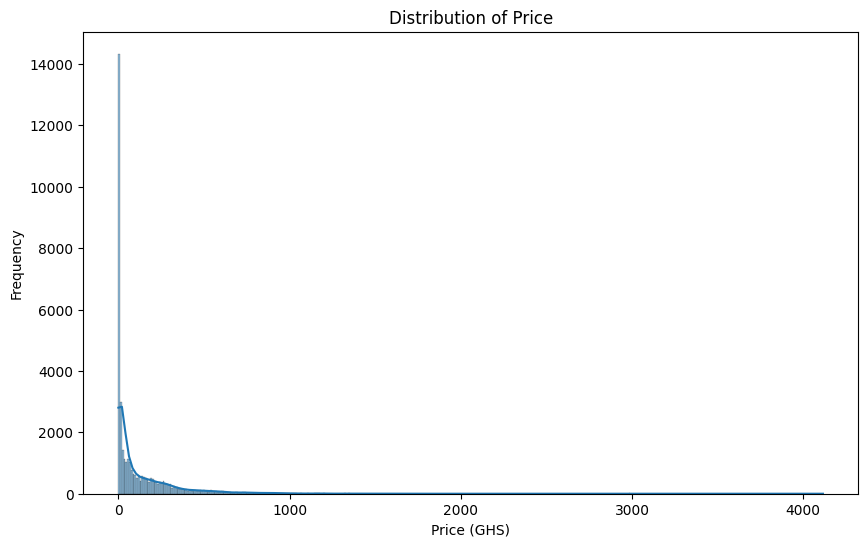

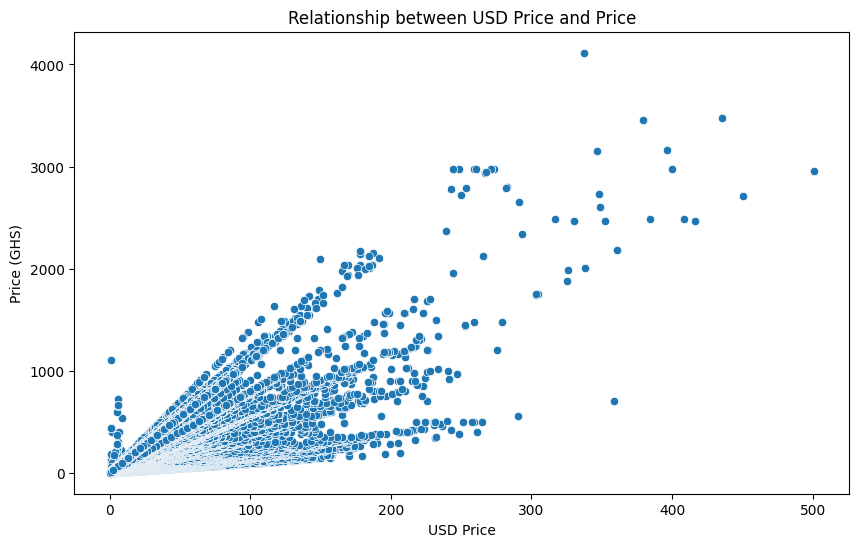

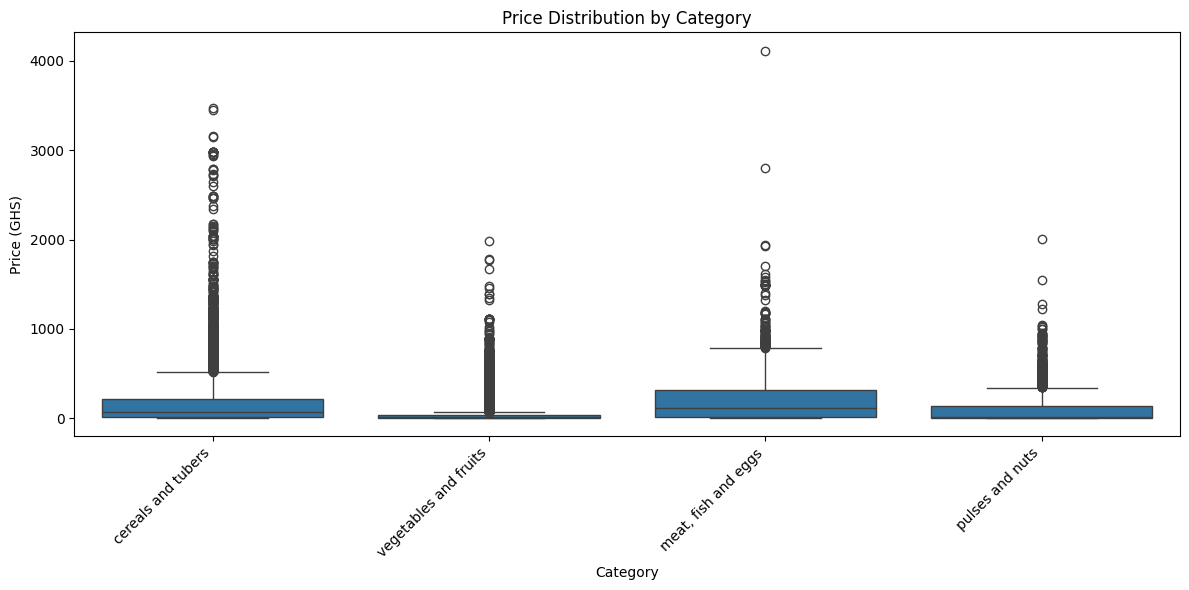

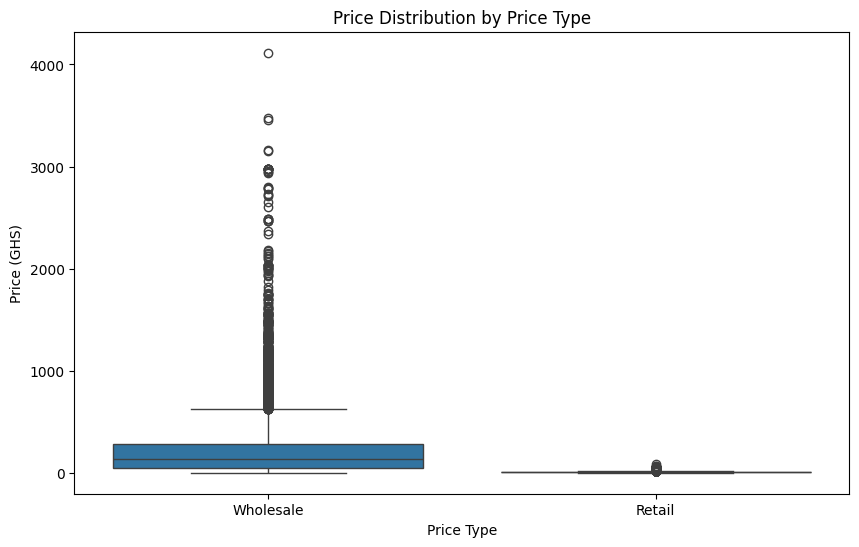


Descriptive Statistics:


,commodity_id,price,usdprice
count,38535.000000,38535.000000,38535.000000
mean,221.920228,132.585003,27.187963
std,247.306858,223.630550,35.768929
min,51.000000,0.320000,0.059000
25%,68.000000,5.535000,0.820000
50%,98.000000,36.120000,12.310000
75%,248.000000,180.000000,43.350000
max,792.000000,4114.550000,500.980000



Correlation Matrix (Numeric Columns):


,commodity_id,price,usdprice
commodity_id,1.000000,0.005705,-0.133082
price,0.005705,1.000000,0.790107
usdprice,-0.133082,0.790107,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of the target variable ('price')
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (GHS)')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationship between 'usdprice' and 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='usdprice', y='price', data=df)
plt.title('Relationship between USD Price and Price')
plt.xlabel('USD Price')
plt.ylabel('Price (GHS)')
plt.show()

# Explore the relationship between 'category' and 'price'
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='price', data=df)
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price (GHS)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Explore the relationship between 'pricetype' and 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='pricetype', y='price', data=df)
plt.title('Price Distribution by Price Type')
plt.xlabel('Price Type')
plt.ylabel('Price (GHS)')
plt.show()

# Display descriptive statistics for the numeric columns
print("\nDescriptive Statistics:")
display(df.describe())

# Display correlation matrix for numeric columns
print("\nCorrelation Matrix (Numeric Columns):")
display(df.corr(numeric_only=True))

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score

# Train and evaluate Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression:")
print(f"  Mean Absolute Error: {mae_lr:.2f}")
print(f"  R² Score: {r2_lr:.2f}")

# Train and evaluate Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nRidge Regression:")
print(f"  Mean Absolute Error: {mae_ridge:.2f}")
print(f"  R² Score: {r2_ridge:.2f}")

# Train and evaluate Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\nLasso Regression:")
print(f"  Mean Absolute Error: {mae_lasso:.2f}")
print(f"  R² Score: {r2_lasso:.2f}")

Linear Regression:
  Mean Absolute Error: 69.91
  R² Score: 0.70

Ridge Regression:
  Mean Absolute Error: 69.91
  R² Score: 0.70

Lasso Regression:
  Mean Absolute Error: 69.40
  R² Score: 0.69


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score

# Train and evaluate Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor:")
print(f"  Mean Absolute Error: {mae_rf:.2f}")
print(f"  R² Score: {r2_rf:.2f}")

# Train and evaluate Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("\nLinear Regression:")
print(f"  Mean Absolute Error: {mae_lr:.2f}")
print(f"  R² Score: {r2_lr:.2f}")

# Train and evaluate Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nRidge Regression:")
print(f"  Mean Absolute Error: {mae_ridge:.2f}")
print(f"  R² Score: {r2_ridge:.2f}")

# Train and evaluate Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\nLasso Regression:")
print(f"  Mean Absolute Error: {mae_lasso:.2f}")
print(f"  R² Score: {r2_lasso:.2f}")

Random Forest Regressor:
  Mean Absolute Error: 44.17
  R² Score: 0.80

Linear Regression:
  Mean Absolute Error: 69.91
  R² Score: 0.70

Ridge Regression:
  Mean Absolute Error: 69.91
  R² Score: 0.70

Lasso Regression:
  Mean Absolute Error: 69.40
  R² Score: 0.69


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Standardize the data - important for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model_mlp = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)), # Input layer
    keras.layers.Dense(128, activation='relu'), # Hidden layer 1
    keras.layers.Dense(64, activation='relu'),  # Hidden layer 2
    keras.layers.Dense(1) # Output layer (for regression)
])

# Compile the model
model_mlp.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_mlp.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
loss, mae_mlp = model_mlp.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nFeedforward Neural Network (MLP):")
print(f"  Mean Absolute Error: {mae_mlp:.2f}")

# Make predictions
y_pred_mlp = model_mlp.predict(X_test_scaled).flatten()

# Calculate R² score
r2_mlp = r2_score(y_test, y_pred_mlp)
print(f"  R² Score: {r2_mlp:.2f}")


Feedforward Neural Network (MLP):
  Mean Absolute Error: 54.51
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
  R² Score: 0.79


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# Ensure latitude and longitude are numeric
X_train['latitude'] = pd.to_numeric(X_train['latitude'], errors='coerce')
X_train['longitude'] = pd.to_numeric(X_train['longitude'], errors='coerce')
X_test['latitude'] = pd.to_numeric(X_test['latitude'], errors='coerce')
X_test['longitude'] = pd.to_numeric(X_test['longitude'], errors='coerce')

# Handle any NaNs that resulted from coercion by filling with 0 (or a more appropriate strategy)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


# Initialize and train the XGBoost Regressor
# Set enable_categorical=True to handle one-hot encoded columns if they are detected as categorical
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, random_state=42, enable_categorical=True)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor:")
print(f"  Mean Absolute Error: {mae_xgb:.2f}")
print(f"  R² Score: {r2_xgb:.2f}")

XGBoost Regressor:
  Mean Absolute Error: 45.57
  R² Score: 0.80


In [ ]:
# Assuming 'model' (the trained Random Forest Regressor) is available from a previous cell's execution
# and 'X' (the preprocessed features DataFrame) is also available.

# Simulate new unseen data by taking a few rows from the original preprocessed data X
# In a real scenario, you would load your new data here and apply the same preprocessing steps
new_unseen_data = X.sample(5, random_state=42) # Taking 5 random samples as example

# Ensure the new data has the same columns and order as the training data used by the model
# This is crucial if you have applied operations like one-hot encoding.
# We can re-apply the same preprocessing steps or ensure columns match X_train
# For simplicity here, we'll assume new_unseen_data is already preprocessed like X.
# In a real application, you'd apply the same transformations (like one-hot encoding with the same categories).

# If your new data is in its original format, you would need to apply the preprocessing steps from cell 6f60fe08
# Example (conceptual - might need adjustments based on your actual new data format):
# new_df_original = pd.read_csv("your_new_data.csv") # Load your new data
# new_df_preprocessed = preprocess_new_data(new_df_original, ...) # Apply your preprocessing function

# Make predictions using the trained Random Forest model
new_predictions = model.predict(new_unseen_data)

print("New Unseen Data (sample):")
display(new_unseen_data)

print("\nPredicted Prices for New Data:")
print(new_predictions)

New Unseen Data (sample):


,latitude,longitude,commodity_id,usdprice,category_cereals and tubers,"category_meat, fish and eggs",category_pulses and nuts,category_vegetables and fruits,commodity_Cassava,commodity_Cowpeas,...,commodity_Plantains (apentu),commodity_Rice (imported),commodity_Rice (local),commodity_Rice (paddy),commodity_Sorghum,commodity_Soybeans,commodity_Tomatoes (local),commodity_Tomatoes (navrongo),commodity_Yam,commodity_Yam (puna)
16297,7.58,-1.93,713,75.13,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
24031,10.79,-0.85,434,0.26,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15903,6.08,-0.25,705,0.12,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26003,10.05,-2.48,710,0.59,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
471,6.68,-1.62,65,32.07,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0



Predicted Prices for New Data:
[443.99855      2.47655613   0.66582914   3.9854275   88.8565    ]


In [ ]:
import joblib
import os

# Define the filename for the saved model
model_filename = 'random_forest_regressor_model.joblib'

# Save the trained Random Forest model
joblib.dump(model, model_filename)

print(f"Trained Random Forest model saved to '{model_filename}'")

# In a real deployment scenario, you would also need to save:
# 1. The list of columns after one-hot encoding, to ensure new data has the same columns.
#    You can get this from X_train.columns.tolist()
# 2. If you used StandardScaler or other transformers, save those too.

# Example of how you might save the column list (optional but recommended for robust deployment)
columns_filename = 'model_columns.joblib'
joblib.dump(X.columns.tolist(), columns_filename)
print(f"Model column list saved to '{columns_filename}'")

Trained Random Forest model saved to 'random_forest_regressor_model.joblib'
Model column list saved to 'model_columns.joblib'


/tmp/ipython-input-3471794793.py:8: DtypeWarning: Columns (4,5,6,9,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_analysis = pd.read_csv("/content/wfp_food_prices_gha.csv")


Pairplot of Numeric Features:


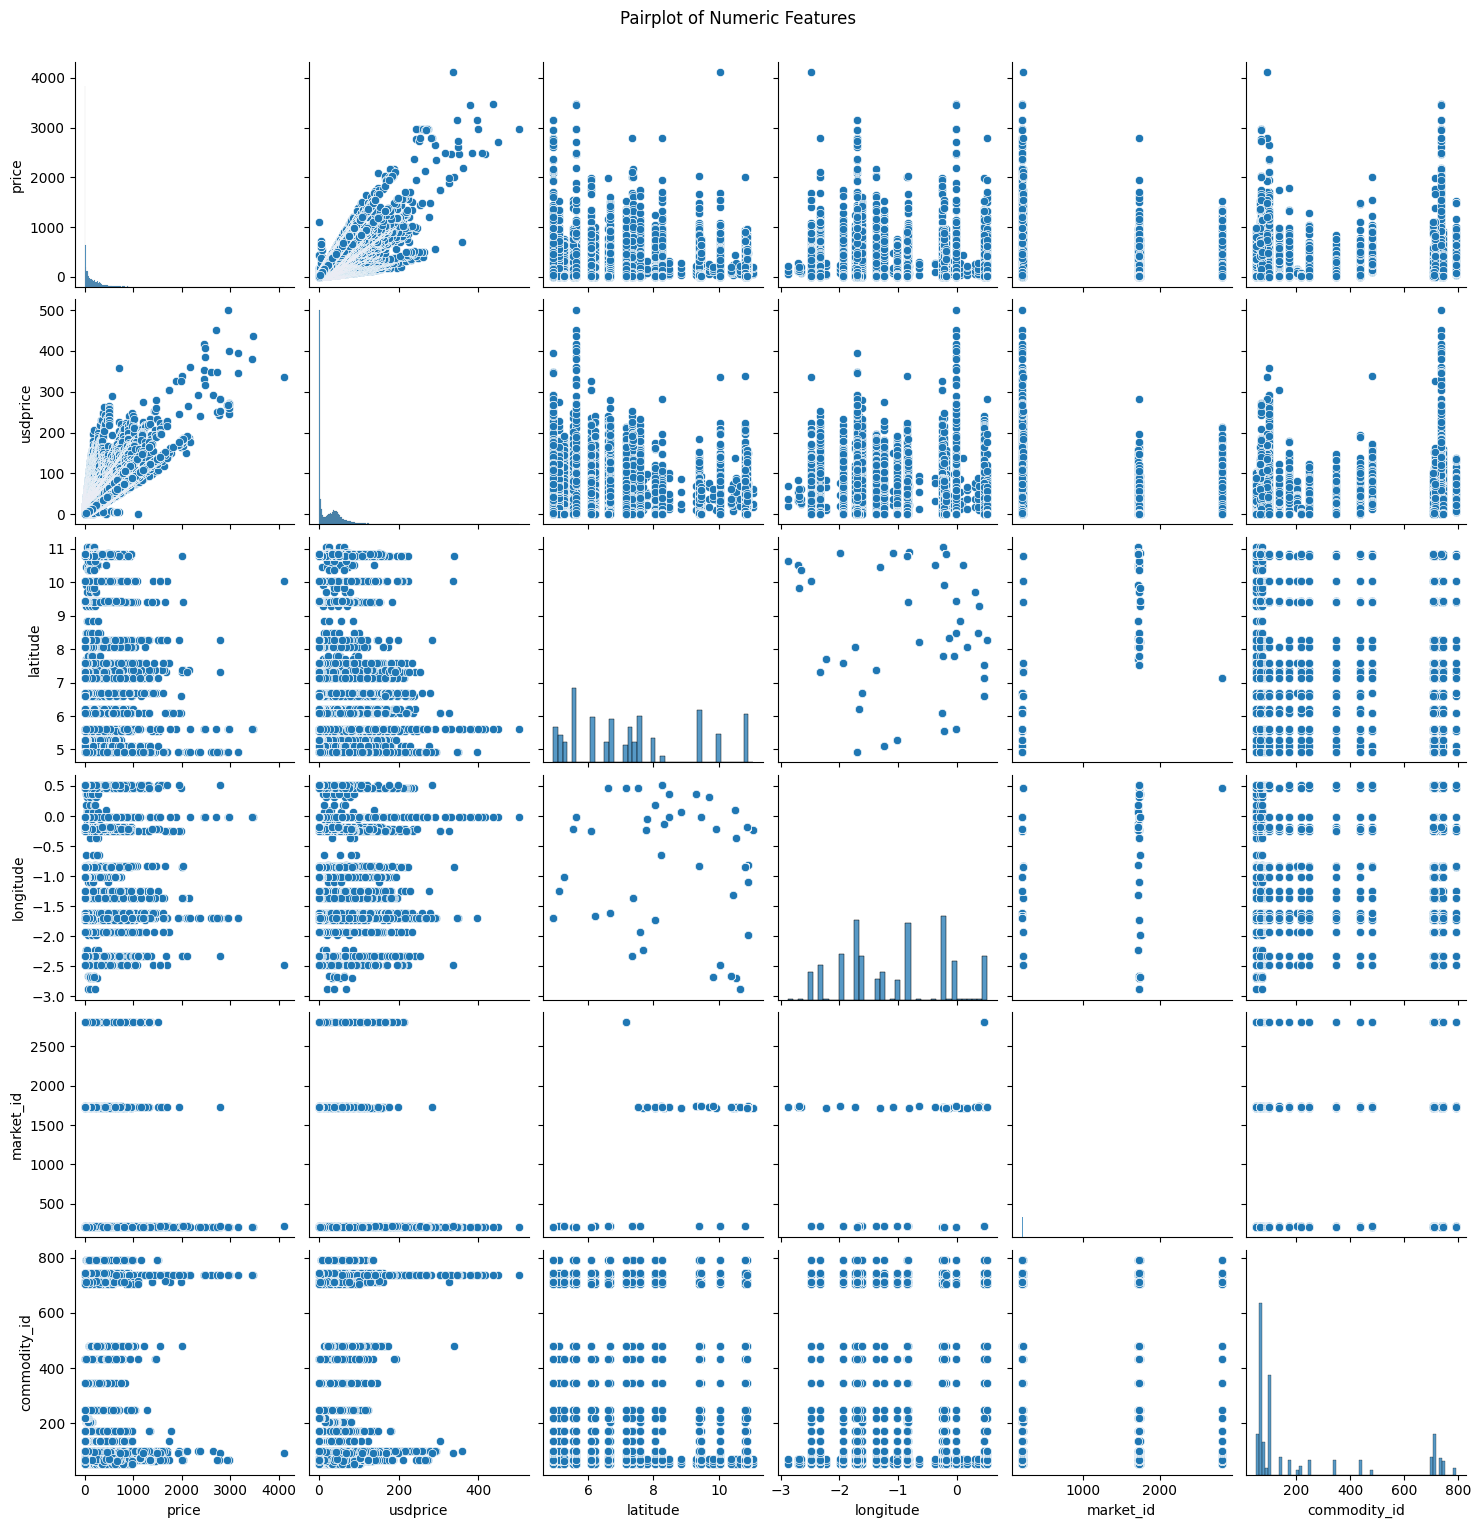


Violin Plot of Price by Category:


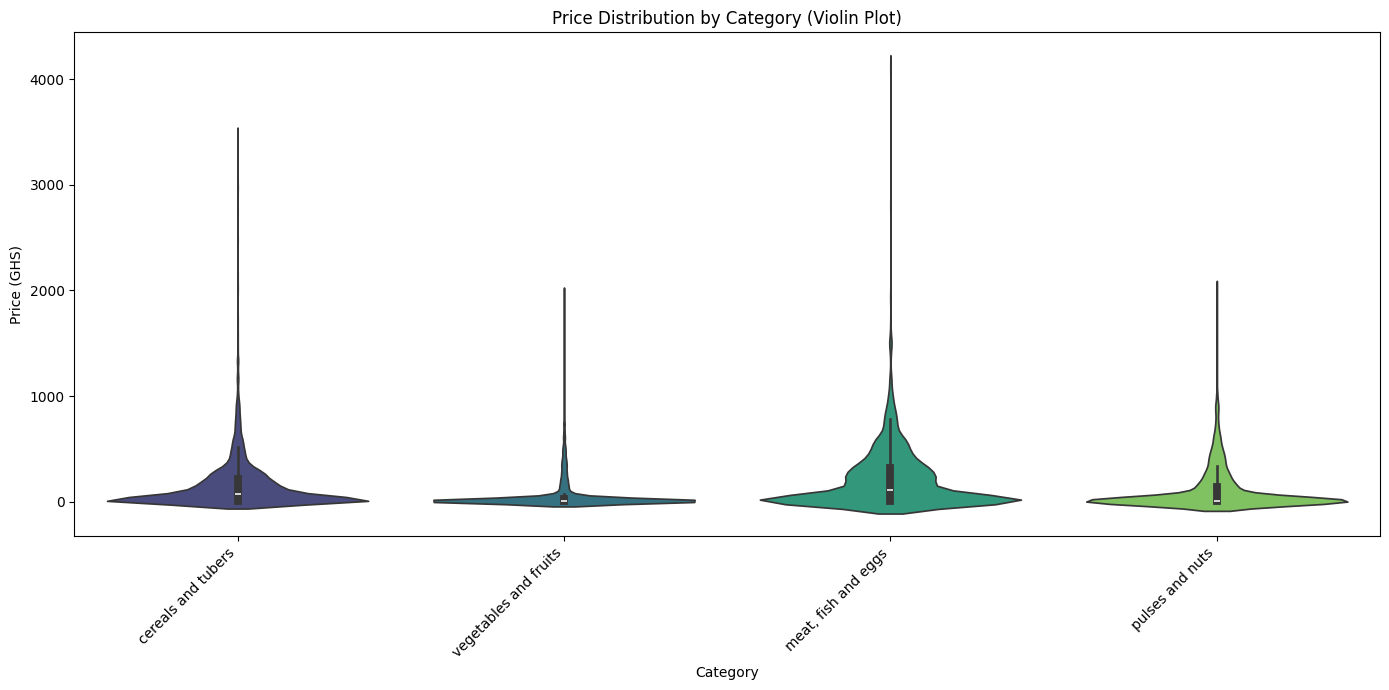


Boxen Plot of Price by Price Type:


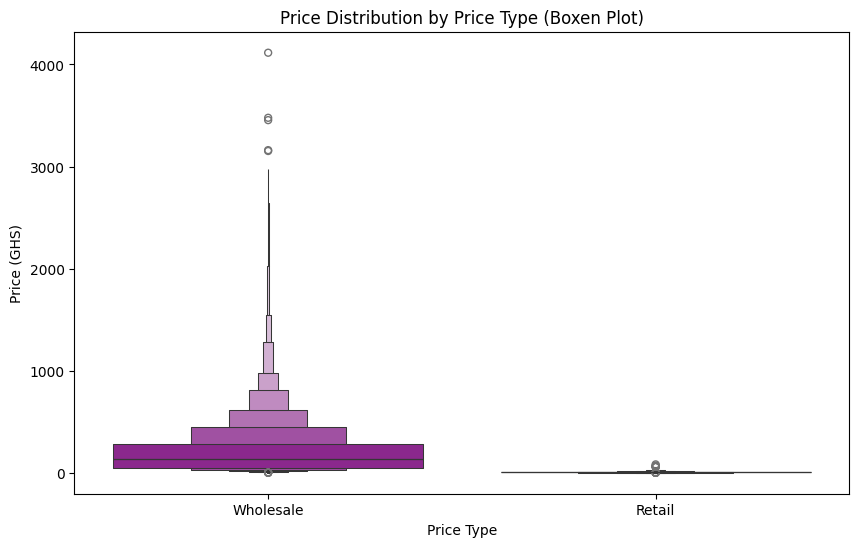


Scatter Plot of Price vs. USD Price with Category Hue:


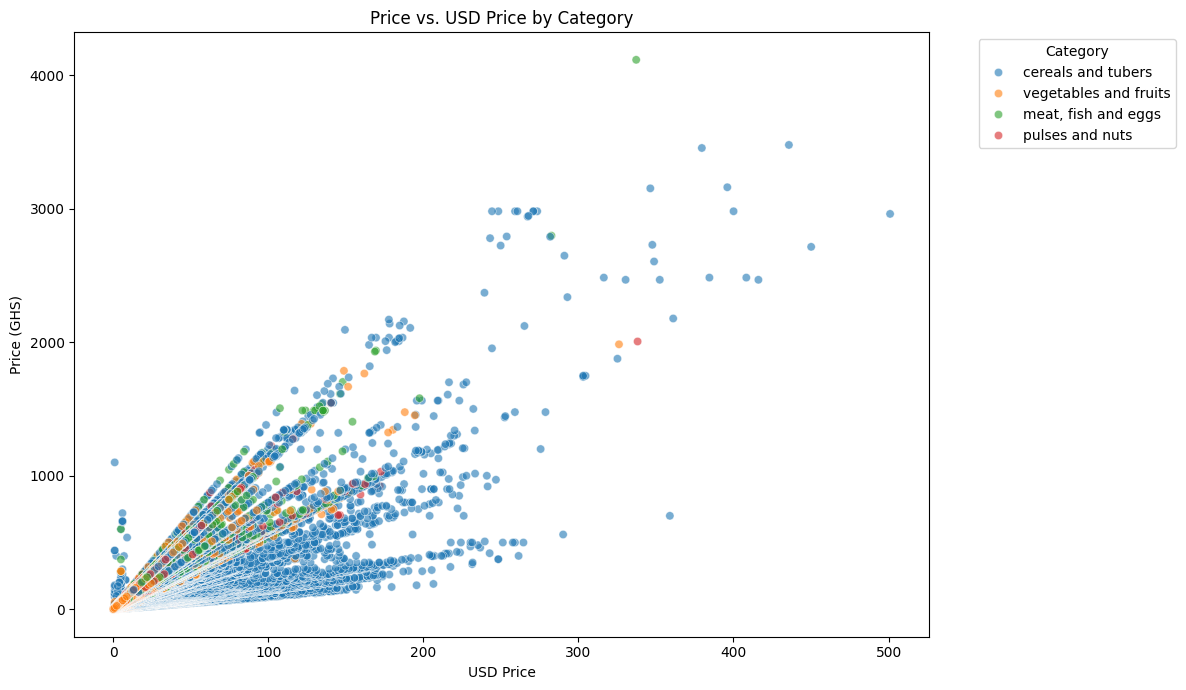


Price Statistics by Category:


,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
cereals and tubers,23414.0,158.085943,239.753755,0.47,7.7725,72.50,213.0975,3477.12
"meat, fish and eggs",2866.0,207.195862,274.959621,1.18,9.6000,110.00,320.0000,4114.55
pulses and nuts,1986.0,109.587764,196.267940,0.38,3.8550,10.94,139.1900,2005.36
vegetables and fruits,10269.0,58.065457,139.201579,0.32,3.7400,7.94,30.8300,1984.21



Average Price by Price Type:


,pricetype,price
0,Retail,5.901730
1,Wholesale,212.134669


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset again to ensure we have the original columns for analysis
# (or use the 'df' variable if it still contains the original data)
try:
    df_analysis = pd.read_csv("/content/wfp_food_prices_gha.csv")
    # Remove the header row that was loaded as data, if present
    if df_analysis.iloc[0]['date'] == 'date':
        df_analysis = df_analysis.iloc[1:].copy()

    # Convert relevant columns to numeric for analysis, coercing errors
    df_analysis['price'] = pd.to_numeric(df_analysis['price'], errors='coerce')
    df_analysis['usdprice'] = pd.to_numeric(df_analysis['usdprice'], errors='coerce')
    df_analysis['latitude'] = pd.to_numeric(df_analysis['latitude'], errors='coerce')
    df_analysis['longitude'] = pd.to_numeric(df_analysis['longitude'], errors='coerce')
    df_analysis['market_id'] = pd.to_numeric(df_analysis['market_id'], errors='coerce')
    df_analysis['commodity_id'] = pd.to_numeric(df_analysis['commodity_id'], errors='coerce')


except Exception as e:
    print(f"Error loading data for analysis: {e}")
    print("Using the existing 'df' variable for analysis. Please ensure it contains the necessary columns.")
    df_analysis = df.copy()


# Drop rows with missing values in key columns for plotting if necessary
df_analysis.dropna(subset=['price', 'usdprice', 'category', 'pricetype'], inplace=True)


# Quantitative Analysis and Colorful Plots

# 1. Pairplot of numeric features
print("Pairplot of Numeric Features:")
sns.pairplot(df_analysis[['price', 'usdprice', 'latitude', 'longitude', 'market_id', 'commodity_id']].dropna())
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

# 2. Violin plot of Price by Category
print("\nViolin Plot of Price by Category:")
plt.figure(figsize=(14, 7))
sns.violinplot(x='category', y='price', data=df_analysis, palette='viridis', hue='category', legend=False) # Added hue and legend=False
plt.title('Price Distribution by Category (Violin Plot)')
plt.xlabel('Category')
plt.ylabel('Price (GHS)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Boxen plot of Price by Price Type
print("\nBoxen Plot of Price by Price Type:")
plt.figure(figsize=(10, 6))
sns.boxenplot(x='pricetype', y='price', data=df_analysis, palette='plasma', hue='pricetype', legend=False) # Added hue and legend=False
plt.title('Price Distribution by Price Type (Boxen Plot)')
plt.xlabel('Price Type')
plt.ylabel('Price (GHS)')
plt.show()

# 4. Scatter plot of Price vs. USD Price with Category as Hue
print("\nScatter Plot of Price vs. USD Price with Category Hue:")
plt.figure(figsize=(12, 7))
sns.scatterplot(x='usdprice', y='price', hue='category', data=df_analysis, palette='tab10', alpha=0.6)
plt.title('Price vs. USD Price by Category')
plt.xlabel('USD Price')
plt.ylabel('Price (GHS)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5. Quantitative summary: Price statistics by Category
print("\nPrice Statistics by Category:")
display(df_analysis.groupby('category')['price'].describe())

# 6. Quantitative summary: Average Price by Price Type
print("\nAverage Price by Price Type:")
display(df_analysis.groupby('pricetype')['price'].mean().reset_index())


Correlation Heatmap (Numeric Columns):


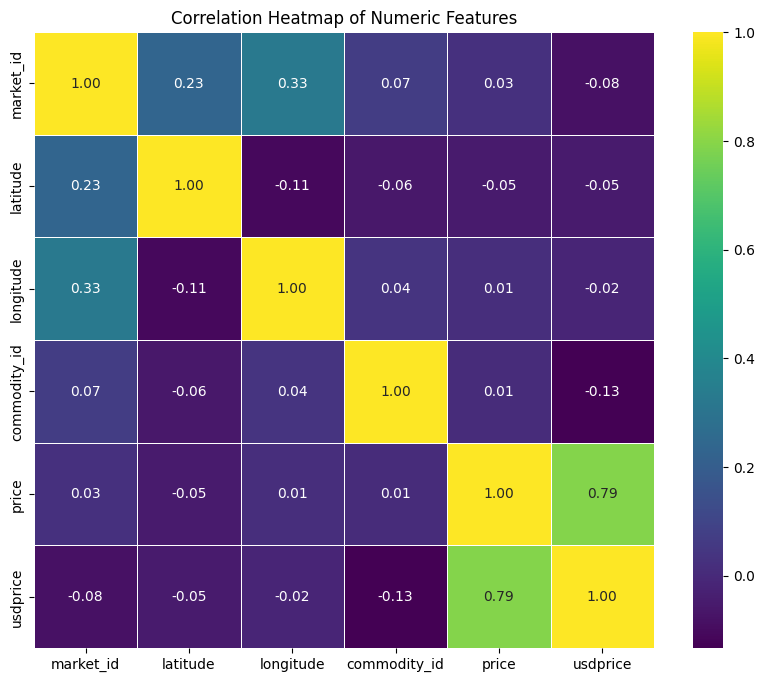

In [ ]:
# Qualitative Analysis - Correlation Heatmap with Bright Colors
print("\nCorrelation Heatmap (Numeric Columns):")
plt.figure(figsize=(10, 8))
sns.heatmap(df_analysis.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()